# **PIE CHARTS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
# Load dataset from database
conn = sqlite3.connect('my_analysis.db')

query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Set view options
pd.set_option("display.max_columns", None)

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,None,None,None,None,None,None,None,None,None,United States of America,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,I have never visited Stack Overflow or the Sta...,None,None,None,None,None,Yes,Very favorable,Increase productivity,None,None,None,None,None,None,None,None,None,None,None,None,None,No,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",None,None,None,None,None,United Kingdom of Great Britain and Northern I...,None,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,None,None,None,None,None,None,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,None,None,None,Microsoft Teams;Slack,Slack,Slack,None,None,None,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",None,None,None,None,None,None,None,None,Non

---

#### VISUALIZING DATA COMPOSITION WITH PIE CHARTS

Create a Pie Chart of the Top 5 Databases Respondents Want to Work With

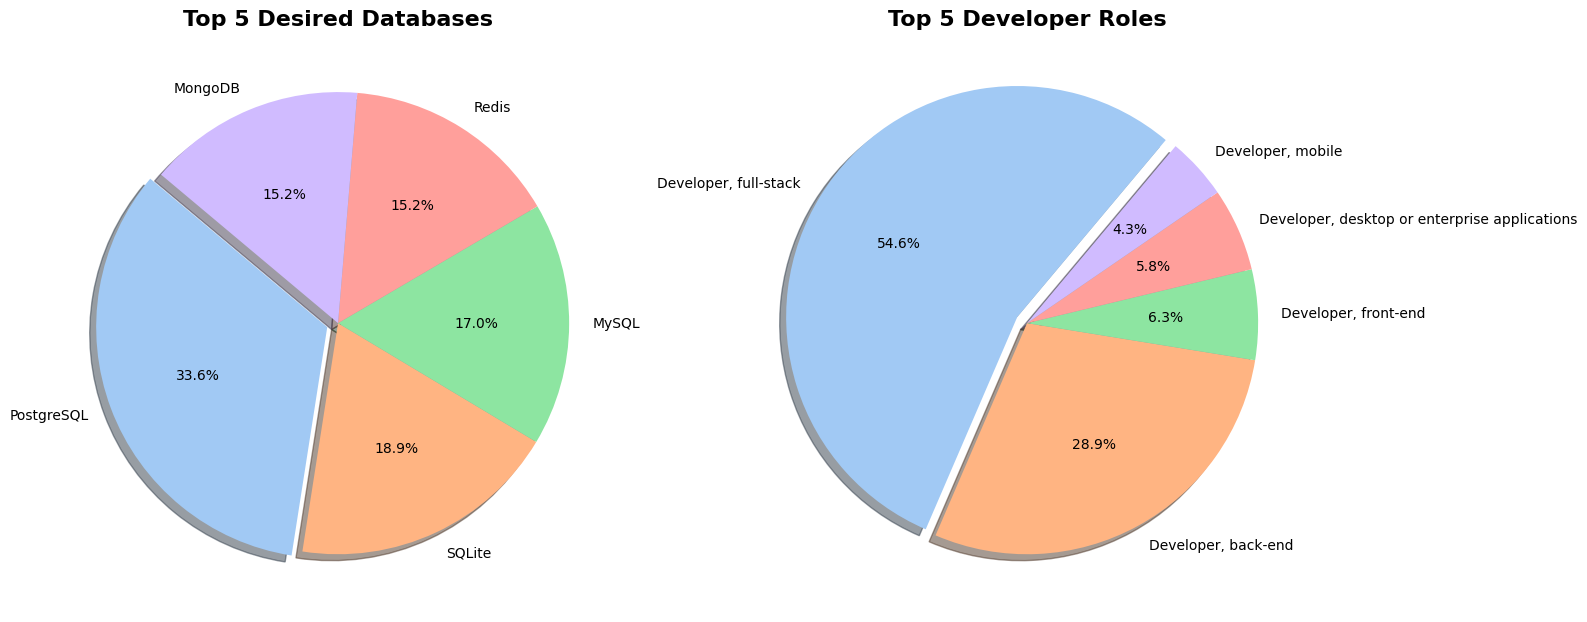

In [50]:
# --- DATABASE ---
# Select Data
dbdev_data = df.dropna(subset=['DatabaseWantToWorkWith', 'DevType'])[['DatabaseWantToWorkWith', 'DevType']].copy()

# Fix Database column values
dbdev_data['Database'] = dbdev_data['DatabaseWantToWorkWith'].str.split(';')
database_explode = dbdev_data.explode('Database')

# Pick Top 5 database
top_db = database_explode['Database'].value_counts().nlargest(5).reset_index(name='count')


# --- Developer Roles ---
dbdev_data['Dev_Roles'] = dbdev_data['DevType'].str.split(';')
developer_explode = dbdev_data.explode('Dev_Roles')

# Pick Top 5 Database
top_dev = (developer_explode[(developer_explode['Dev_Roles'] != 'Student') &
                            (developer_explode['Dev_Roles'] != 'Other (please specify):')]
                            ['Dev_Roles'].value_counts().nlargest(5).reset_index(name='count'))

# --- SUB PLOT ---
fig, ax = plt.subplots(1, 2, figsize=(16,8))

# Set color
colors = sns.color_palette('pastel')

# Database Pie
ax[0].pie(top_db['count'], labels=top_db['Database'],
          autopct='%1.1f%%', startangle=140, colors=colors, 
          explode=[0.05] + [0]*4, shadow=True)

ax[0].set_title("Top 5 Desired Databases", fontsize=16, fontweight='bold')

# Developer Pie
ax[1].pie(top_dev['count'], labels=top_dev['Dev_Roles'],
          autopct='%1.1f%%', startangle=50, colors=colors, 
          explode=[0.05] + [0]*4, shadow=True)

ax[1].set_title("Top 5 Developer Roles", fontsize=16, fontweight='bold')

# Adjust Layout
plt.tight_layout()

plt.show()

Create a pie chart for the operating system used by respondents for professional use

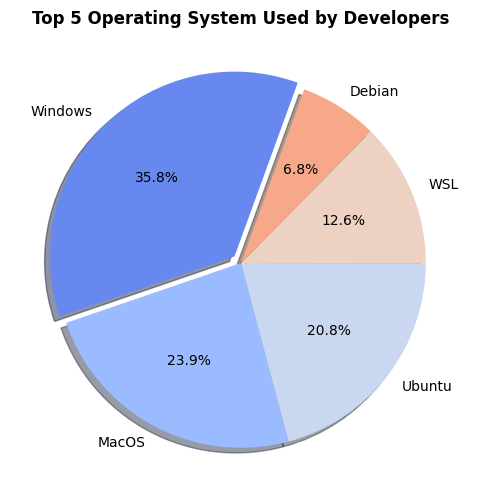

In [88]:
# Select Data
os_data = df[['OpSysProfessional use']].dropna().copy()

# Fix os column values
os_data['os'] = os_data['OpSysProfessional use'].str.split(';')
os_explode = os_data.explode('os')

# Pick top 5 operating system
top_os = os_explode['os'].value_counts().head().reset_index(name='count')

# Fix OS name
os_name ={
    'Windows Subsystem for Linux (WSL)' : 'WSL'
}
top_os['os'] = top_os['os'].replace(os_name)

# PIE CHART
plt.figure(figsize=(6,6))
plt.pie(top_os['count'], labels=top_os['os'], autopct='%1.1f%%',
        colors=sns.color_palette('coolwarm'), startangle=70,
        explode=[0.05] + [0]*4, shadow=True)

plt.title("Top 5 Operating System Used by Developers", fontweight='bold')

plt.show()

---

#### ADDITIONAL VISUALIZATIONS AND COMPARISONS

Pie chart for Top 5 Programming Languages Respondents Have Worked With

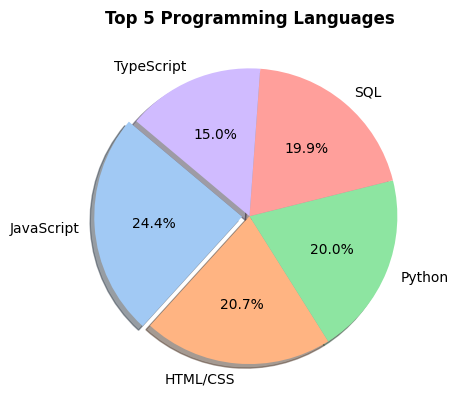

In [112]:
# Select Data
lang_data = df[['LanguageHaveWorkedWith']].dropna().copy()

# Fix lang column values
lang_data['language'] = lang_data['LanguageHaveWorkedWith'].str.split(';')
lang_explode = lang_data.explode('language')

# Pick top 5 languages
top_lang = lang_explode['language'].value_counts().head()

# PIE CHART
plt.pie(top_lang, labels=top_lang.index, autopct='%1.1f%%',
        colors=sns.color_palette('pastel', 5), explode=[0.05] + [0]*4, 
        shadow=True, startangle=140)

plt.title("Top 5 Programming Languages", fontweight='bold')

plt.show()

Pie Chart for Top Collaboration Tools used in Professional Use

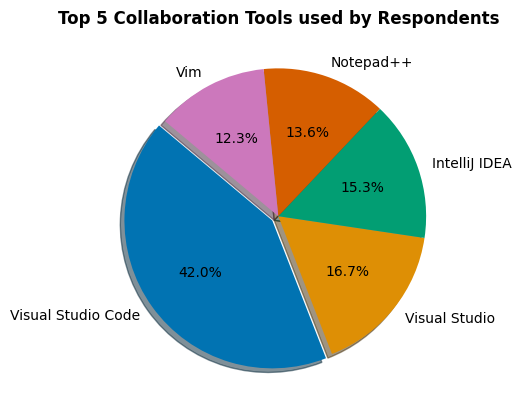

In [116]:
# Select Data
tool_data = df[['NEWCollabToolsHaveWorkedWith']].dropna().copy()

# Fix Tool column data
tool_data['tools'] = tool_data['NEWCollabToolsHaveWorkedWith'].str.split(';')
tool_explode = tool_data.explode('tools')

# Top 5 tools
top_tool = tool_explode['tools'].value_counts().head()

# PIE CHART
plt.pie(top_tool, labels=top_tool.index, colors=sns.color_palette('colorblind'),
        autopct='%1.1f%%', shadow=True, explode=[0.05] + [0]*4, 
        startangle=140)

plt.title("Top 5 Collaboration Tools used by Respondents", fontweight='bold')

plt.show()

---

#### ANALYZING AND INTERPRETING COMPOSITION

Pie Chart of Repondents Most Admired Programming Languages

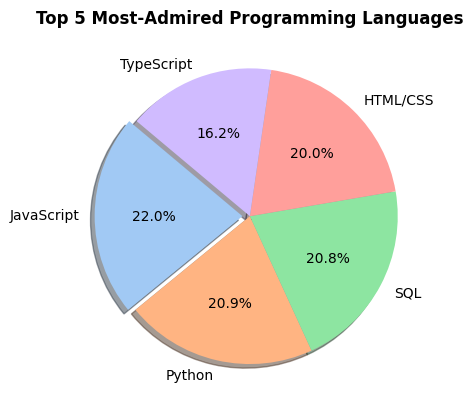

In [120]:
# Select Data
admired_lang = df[['LanguageAdmired']].dropna().copy()

# Fix admired languages column values
admired_lang['admired_language'] = admired_lang['LanguageAdmired'].str.split(';')
adlang_explode = admired_lang.explode('admired_language')

# Top 5 admired languages
top_adlang = adlang_explode['admired_language'].value_counts().head()

# PIE CHART
plt.pie(top_adlang, labels=top_adlang.index, autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), shadow=True,
        explode=[0.05] + [0]*4, startangle=140)

plt.title("Top 5 Most-Admired Programming Languages", fontweight='bold')

plt.show()

Pie Chart of Tools Used for AI Development

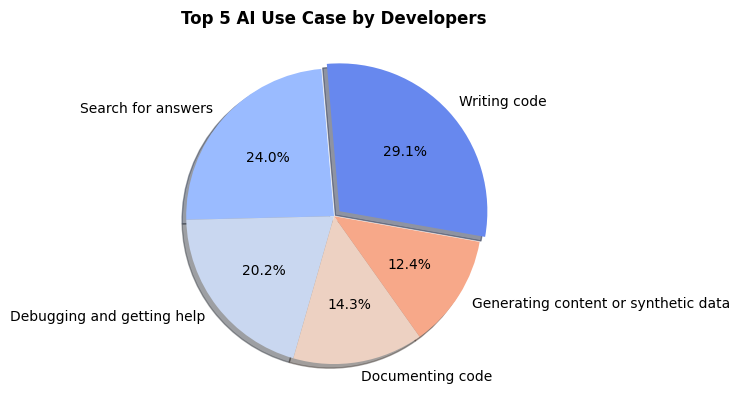

In [136]:
ai_tool_data = df[['AIToolCurrently Using']].dropna().copy()

ai_tool_data['ai_tool'] = ai_tool_data['AIToolCurrently Using'].str.split(';')
ai_tool = ai_tool_data.explode('ai_tool')

top_ai = ai_tool['ai_tool'].value_counts().head()

# PIE CHART
plt.pie(top_ai, labels=top_ai.index, autopct='%1.1f%%',
        colors=sns.color_palette('coolwarm'), startangle=-10, 
        explode=[0.05] + [0]*4, shadow=True)

plt.title("Top 5 AI Use Case by Developers", fontweight='bold')

plt.show()

Pie Chart for Preferred Web Frameworks And Desired Embedded Technologies

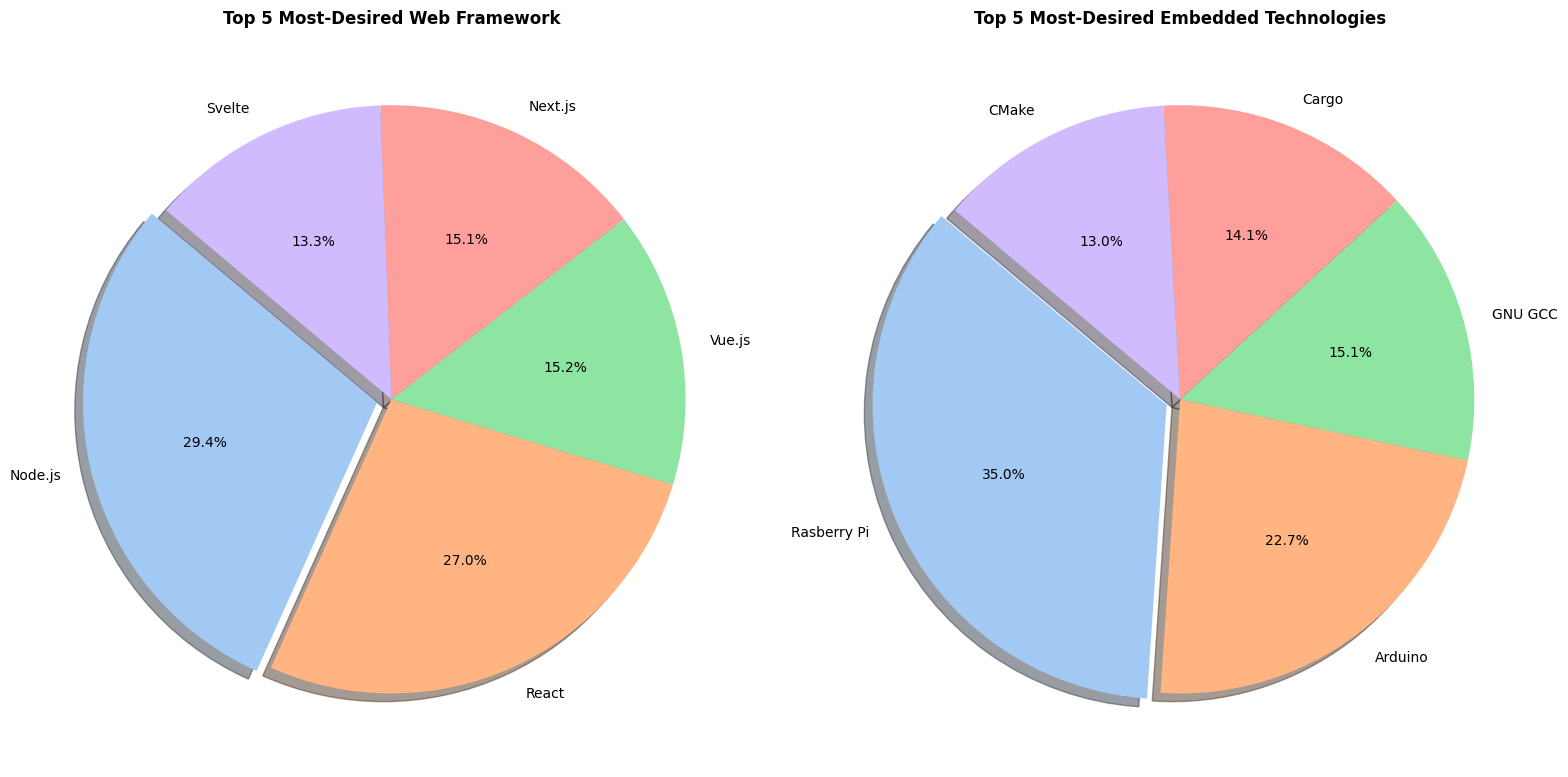

In [141]:
# Select Data
frame_embed = df[['WebframeWantToWorkWith','EmbeddedWantToWorkWith']].dropna().copy()

# Framework Data
frame_embed['framework'] = frame_embed['WebframeWantToWorkWith'].str.split(';')
frame_data = frame_embed.explode('framework')

# Embedded Data
frame_embed['embedded'] = frame_embed['EmbeddedWantToWorkWith'].str.split(';')
embedded_data = frame_embed.explode('embedded')

# Pick top 5
top_frame = frame_data['framework'].value_counts().head()
top_embedded = embedded_data['embedded'].value_counts().head()

# SUB PLOTS: PIE CHARTS
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Framework Pie Chart
ax[0].pie(top_frame, labels=top_frame.index, autopct='%1.1f%%',
          colors=colors, explode=[0.05] + [0]*4, shadow=True,
          startangle=140)
ax[0].set_title("Top 5 Most-Desired Web Framework", fontweight='bold')

# Embedded Pie Chart
ax[1].pie(top_embedded, labels=top_embedded.index, autopct='%1.1f%%',
          colors=colors, explode=[0.05] + [0]*4, shadow=True,
          startangle=140)
ax[1].set_title("Top 5 Most-Desired Embedded Technologies", fontweight='bold')

# Adjust layout
plt.tight_layout()

plt.show()

---

In [140]:
conn.close()

---

#### **Summary**

- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.